In [26]:
#New dataframe that looked at both race an class

import pandas as pd
import numpy  as np
import json
import sys 

# Plotting packages
from   mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn           as sns
custom_style = {"axes.spines.right": False, "axes.spines.top": False,}
sns.set_style("ticks", rc=custom_style)

# Statistical packages
import scipy.stats           as stats
from scipy.cluster           import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn                 import preprocessing
from sklearn.cluster         import KMeans
from sklearn.metrics         import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.decomposition   import PCA


# Other packages
from IPython.display import clear_output

df = pd.read_csv('cleaned_data.csv')


In [28]:
# new variable name
new_df=df[['demo_race','demo_class']]

# Clean the race column by splitting it from strings to a list of string
new_df.loc[:, 'demo_race'] = new_df['demo_race'].str.split(', ')


C:\Users\moral\AppData\Local\Temp\ipykernel_8036\1671744174.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:, 'demo_race'] = new_df['demo_race'].str.split(', ')


In [31]:
# Explode the demo_race column in order to expand the datafram 
new_df = new_df.explode('demo_race')

# We are also resetting the index of the dataframe
new_df = new_df.reset_index(drop=True)


              demo_race demo_class
0    Hispanic or Latino    LISP_1A
1                 Asian    LISP_1A
2    Hispanic or Latino    LISP_1A
3    Hispanic or Latino    LISP_1A
4                 Asian    LISP_1D
..                  ...        ...
109  Hispanic or Latino    LISP_18
110  White or Caucasian    LISP_1D
111  White or Caucasian    LISP_1D
112      Middle Eastern    LISP_1C
113  Hispanic or Latino    LISP_1D

[114 rows x 2 columns]


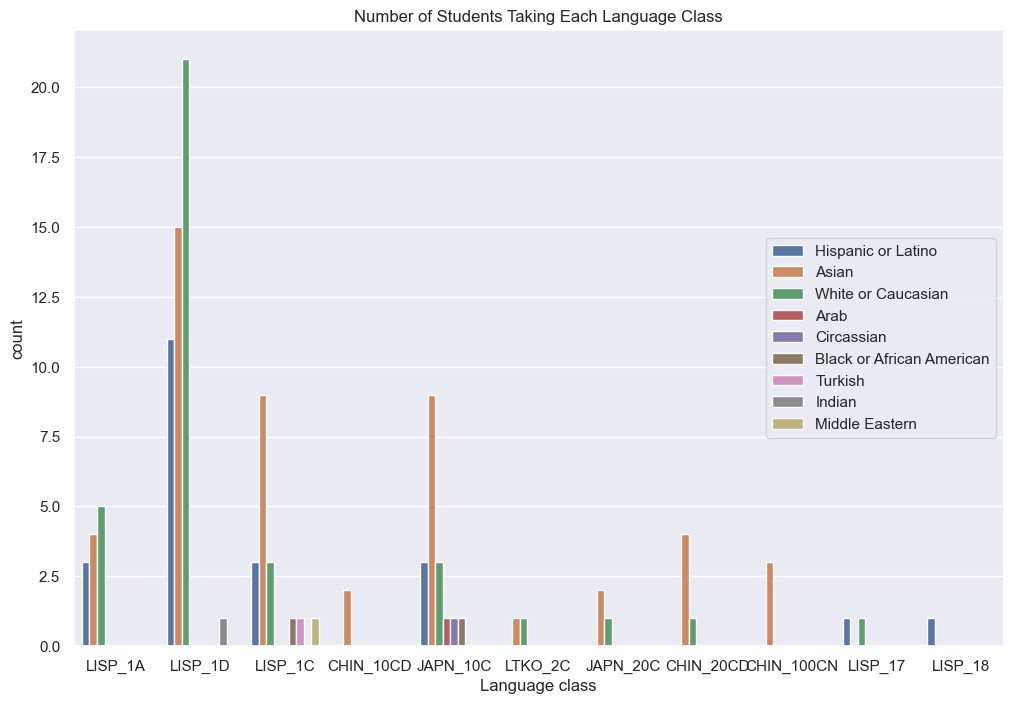

In [36]:
# Setting plot style
sns.set(style='darkgrid')

# Creating the countplot
plt.figure(figsize=(12,8))
sns.countplot(data=new_df, x='demo_class', hue='demo_race')


# Setting title and labels
plt.title("Number of Students Taking Each Language Class")
plt.xlabel("Language class")
plt.ylabel('count')

# Moving the Legend
plt.legend(loc='center right')
# The plot
plt.show()